In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [42]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")



Using device: cuda


In [43]:
MNIST = torchvision.datasets.MNIST(root='.', 
                                   train=True, 
                                   download=True, 
                                   transform=transforms.ToTensor()
                                   )


In [44]:
dado, rotulo = MNIST[0]
print(f"Dado shape: {dado.shape}")
print(f"Rotulo: {rotulo}")

print(dado.size())
print(rotulo)



Dado shape: torch.Size([1, 28, 28])
Rotulo: 5
torch.Size([1, 28, 28])
5


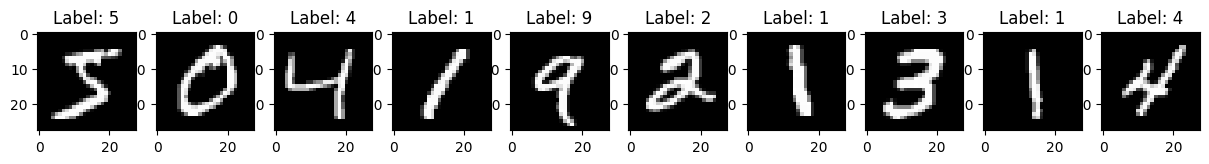

In [45]:
fig, axs = plt.subplots(1, 10, figsize=(15, 4))

for i in range(10):
    dado, rotulo = MNIST[i]
    axs[i].imshow(dado[0], cmap='gray')
    axs[i].set_title(f"Label: {rotulo}")

plt.show()

# Detecção e Segmentação de Objetos



In [46]:
VOC = torchvision.datasets.VOCDetection(root='.', 
                                           download=True,
                                           transform=transforms.ToTensor()
                                           )



Using downloaded and verified file: .\VOCtrainval_11-May-2012.tar
Extracting .\VOCtrainval_11-May-2012.tar to .


<class 'torch.Tensor'>
<class 'dict'>
torch.Size([3, 442, 500])


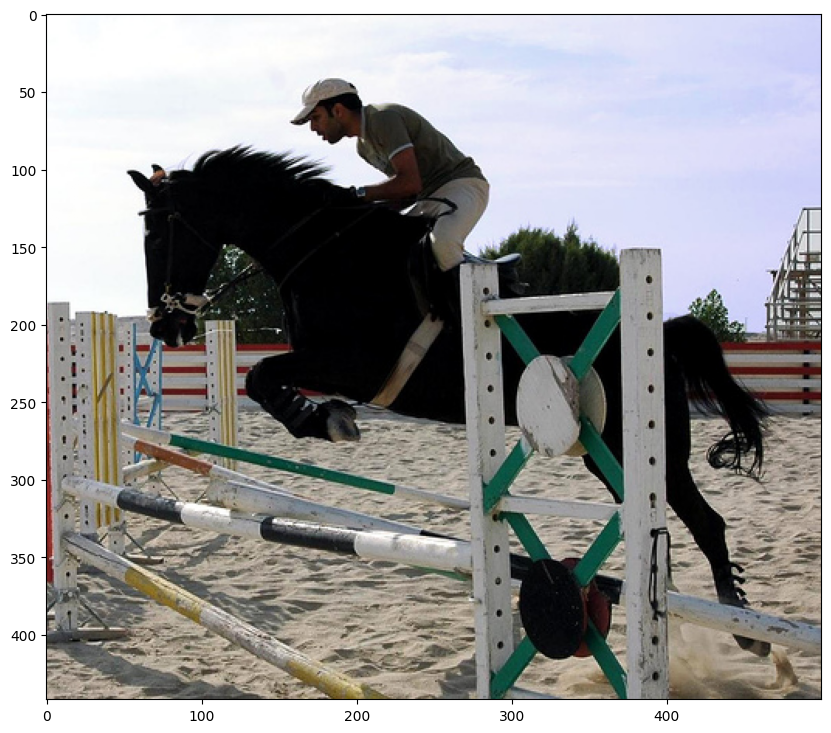

In [47]:
dado, rotulo = VOC[0]

print(type(dado))
print(type(rotulo))

print(dado.size())

dado = dado.permute(1, 2, 0)

plt.figure(figsize=(10, 10))
plt.imshow(dado)
plt.show()


In [48]:
rotulo

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

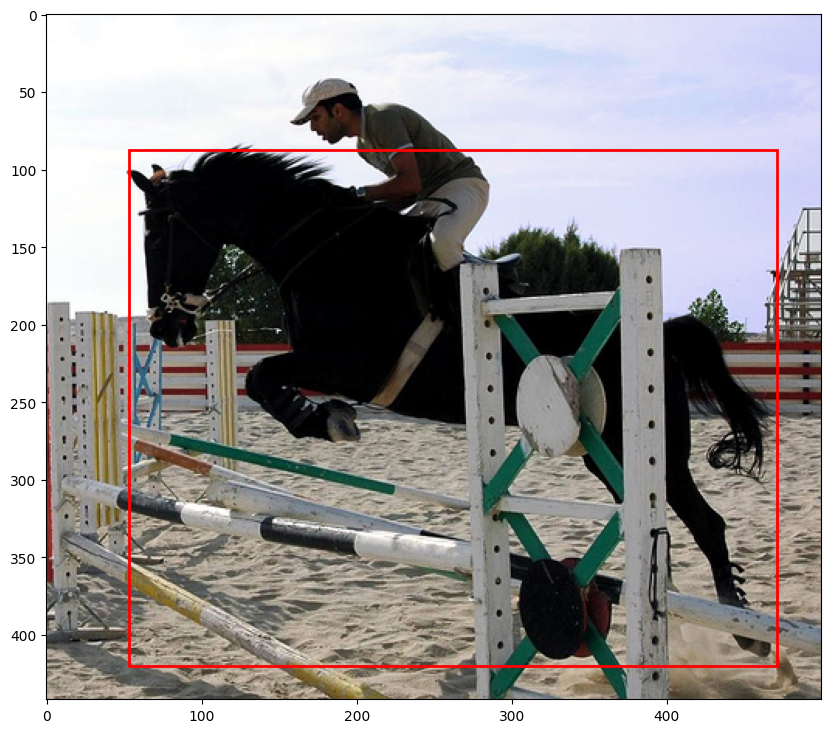

In [52]:
bbox = rotulo['annotation']['object'][0]['bndbox']

xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dado)

w, h = xmax - xmin, ymax - ymin
rect = patches.Rectangle((xmin, ymin), w, h, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()


In [55]:
VOCs = torchvision.datasets.VOCSegmentation(root='.',
                                          download=False,
                                          transform=transforms.ToTensor(),
                                          target_transform=transforms.ToTensor(),
                                          image_set='val',
                                          year='2012'
                                          )



<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([3, 366, 500])
torch.Size([1, 366, 500])


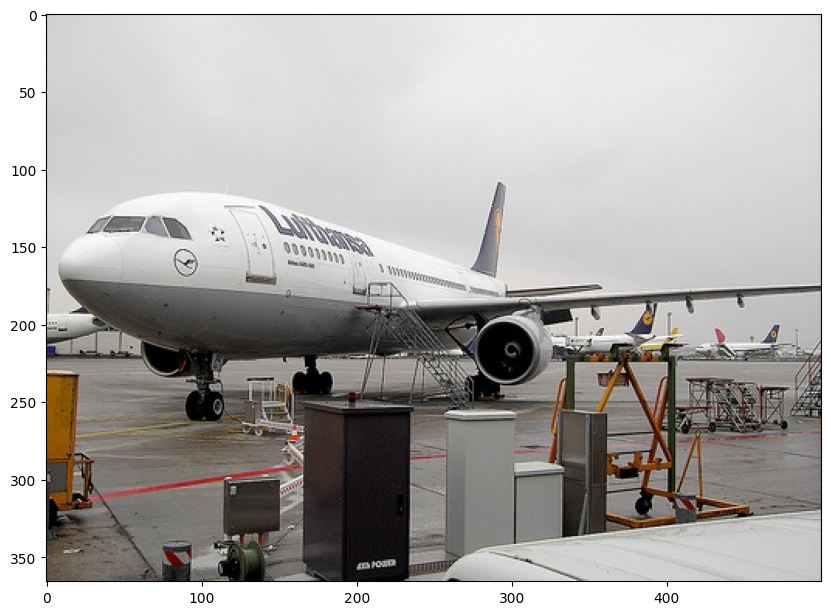

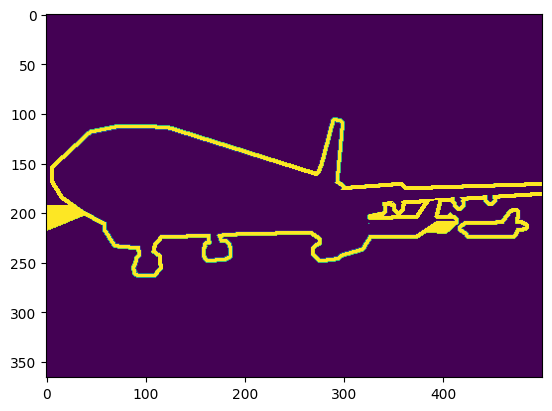

In [62]:
dado, rotulo = VOCs[0]

print(type(dado))
print(type(rotulo))

print(dado.size())
print(rotulo.size())

dado = dado.permute(1, 2, 0)

plt.figure(figsize=(10, 10))

plt.imshow(dado)
plt.show()

plt.imshow(rotulo[0])
plt.show()



Files already downloaded and verified


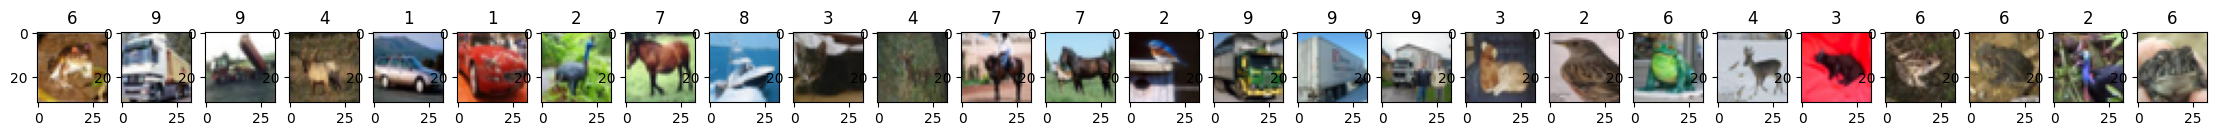

In [68]:
CIFAR10 = torchvision.datasets.CIFAR10(root='.', 
                                      train=True, 
                                      download=True, 
                                      transform=transforms.ToTensor()
                                      )

fig, axs = plt.subplots(1, 26, figsize=(28, 4))

for i in range(26):
    dado, rotulo = CIFAR10[i]
    axs[i].imshow(dado.permute(1, 2, 0))
    axs[i].set_title(rotulo)
plt.show()

